In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
# Removing 'station' and 'Date' columns as they may not be useful for prediction
df = df.drop(['station'], axis=1)

In [6]:
# deleting rows in 'Next_Tmax' and 'Next_Tmin' where null values are present 
null_values = df[['Next_Tmax', 'Next_Tmin']].isnull().any(axis=1)

df = df[~null_values]
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7725 entries, 0 to 7724
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7723 non-null   object 
 1   Present_Tmax      7665 non-null   float64
 2   Present_Tmin      7665 non-null   float64
 3   LDAPS_RHmin       7650 non-null   float64
 4   LDAPS_RHmax       7650 non-null   float64
 5   LDAPS_Tmax_lapse  7650 non-null   float64
 6   LDAPS_Tmin_lapse  7650 non-null   float64
 7   LDAPS_WS          7650 non-null   float64
 8   LDAPS_LH          7650 non-null   float64
 9   LDAPS_CC1         7650 non-null   float64
 10  LDAPS_CC2         7650 non-null   float64
 11  LDAPS_CC3         7650 non-null   float64
 12  LDAPS_CC4         7650 non-null   float64
 13  LDAPS_PPT1        7650 non-null   float64
 14  LDAPS_PPT2        7650 non-null   float64
 15  LDAPS_PPT3        7650 non-null   float64
 16  LDAPS_PPT4        7650 non-null   float64


In [7]:
df.shape

(7725, 24)

In [8]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
Date,310
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7645
LDAPS_RHmax,7637
LDAPS_Tmax_lapse,7648
LDAPS_Tmin_lapse,7648
LDAPS_WS,7648
LDAPS_LH,7648
LDAPS_CC1,7543


In [9]:
# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Filling missing values with mean for numerical columns
df.fillna(df.mean(), inplace=True)

# Forward filling missing values for the 'Date' column
df['Date'].fillna(method='ffill', inplace=True)

In [11]:
df=df.set_index('Date')

In [12]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [13]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 168, dtype: int64


24.0    161
23.8    153
23.1    143
23.5    143
23.3    140
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 156, dtype: int64


56.741402    75
77.030350     2
71.658089     2
19.794666     2
98.524734     2
             ..
61.039379     1
51.072369     1
52.174259     1
55.354607     1
22.933014     1
Name: LDAPS_RHmin, Length: 7646, dtype: int64


88.369140    75
91.878174     2
96.525200     2
92.531029     2
88.938194     2
             ..
96.233223     1
92.978004     1
96.280243     1
97.245651     1
77.243744     1
Name: LDAPS_RHmax, Length: 7638, dtype: int64


29.616253    75
38.542255     2
17.624954     2
28.074101     1
32.037943     1
             ..
29.065611     1
28.629913     1
28.250307     1
28.255363     1
27.939516     1
Name: LDAPS_Tmax

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7725 entries, 2013-06-30 to 2017-08-30
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7725 non-null   float64
 1   Present_Tmin      7725 non-null   float64
 2   LDAPS_RHmin       7725 non-null   float64
 3   LDAPS_RHmax       7725 non-null   float64
 4   LDAPS_Tmax_lapse  7725 non-null   float64
 5   LDAPS_Tmin_lapse  7725 non-null   float64
 6   LDAPS_WS          7725 non-null   float64
 7   LDAPS_LH          7725 non-null   float64
 8   LDAPS_CC1         7725 non-null   float64
 9   LDAPS_CC2         7725 non-null   float64
 10  LDAPS_CC3         7725 non-null   float64
 11  LDAPS_CC4         7725 non-null   float64
 12  LDAPS_PPT1        7725 non-null   float64
 13  LDAPS_PPT2        7725 non-null   float64
 14  LDAPS_PPT3        7725 non-null   float64
 15  LDAPS_PPT4        7725 non-null   float64
 16  lat               7725 n

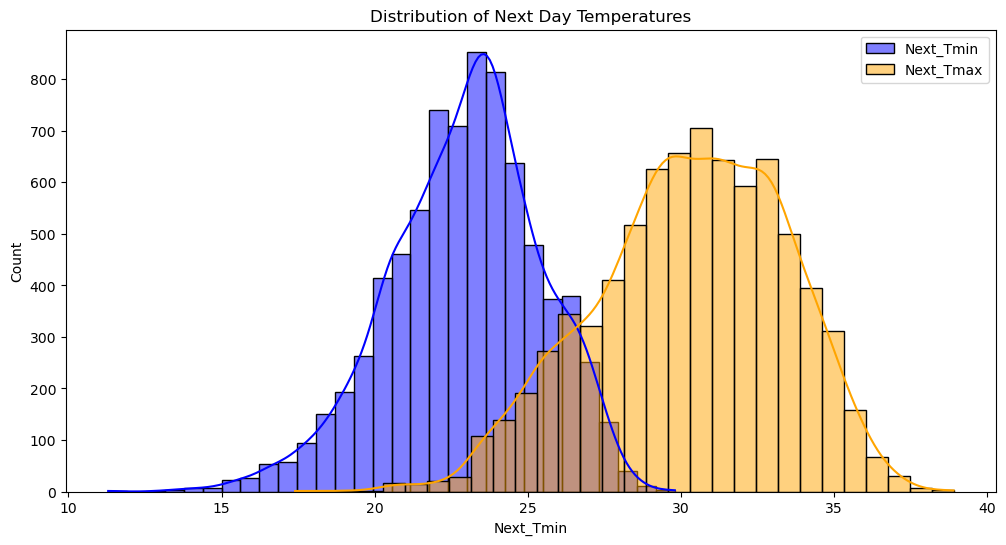

In [15]:
# Distribution of target variables
plt.figure(figsize=(12, 6))
sns.histplot(df['Next_Tmin'], bins=30, kde=True, color='blue', label='Next_Tmin')
sns.histplot(df['Next_Tmax'], bins=30, kde=True, color='orange', label='Next_Tmax')
plt.title('Distribution of Next Day Temperatures')
plt.legend()
plt.show()

In [16]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

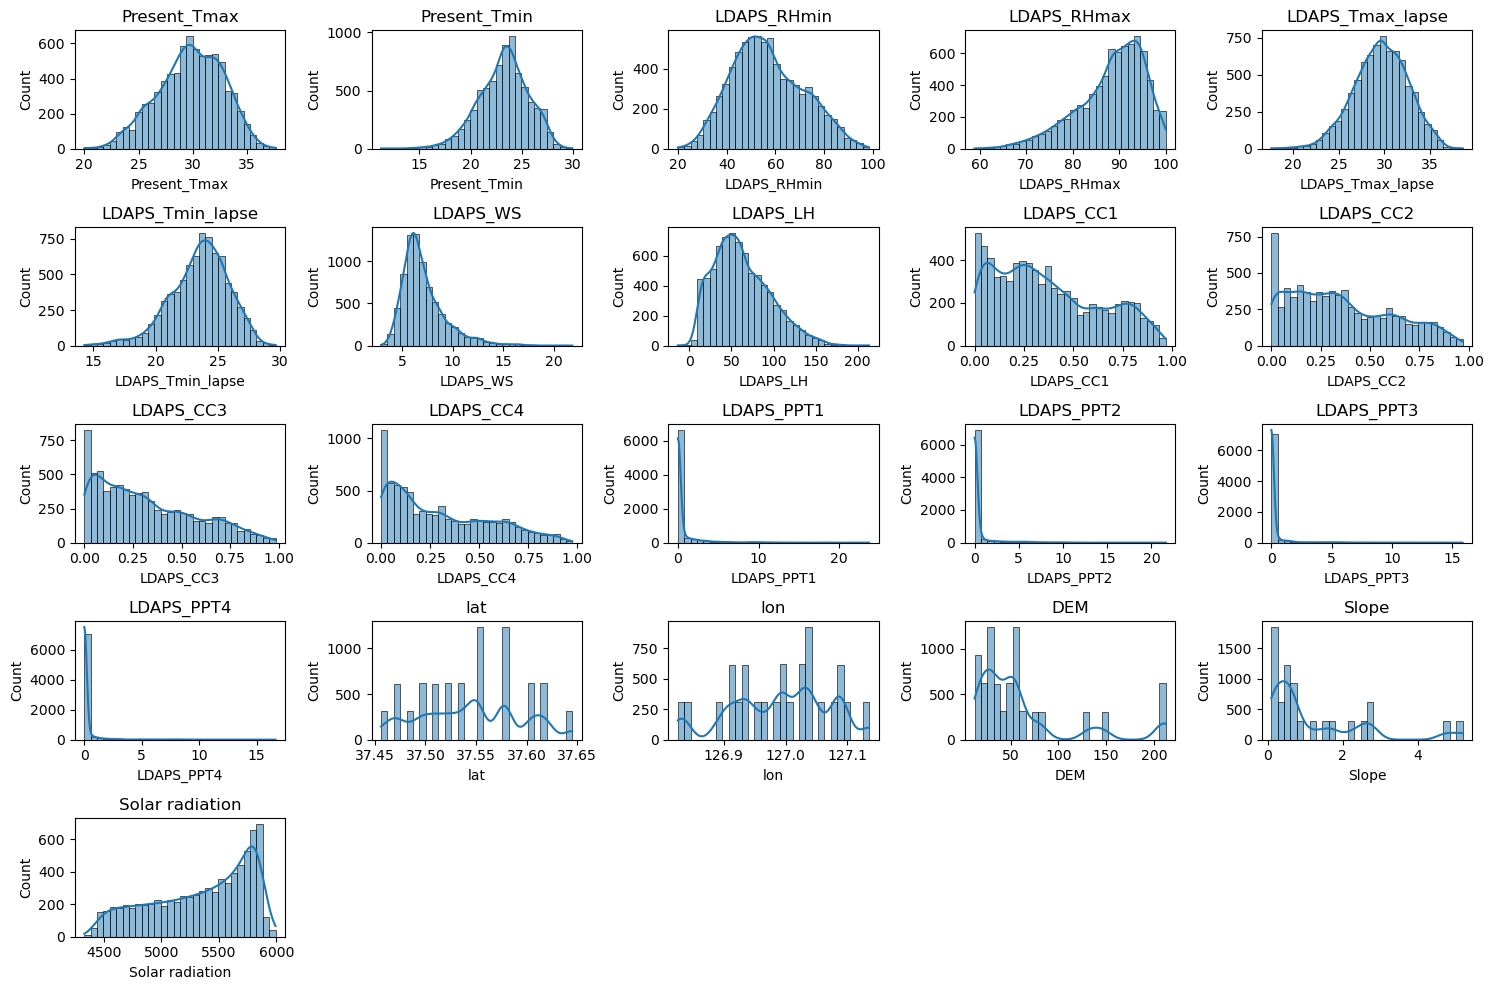

In [17]:
# Distribution of features
features = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

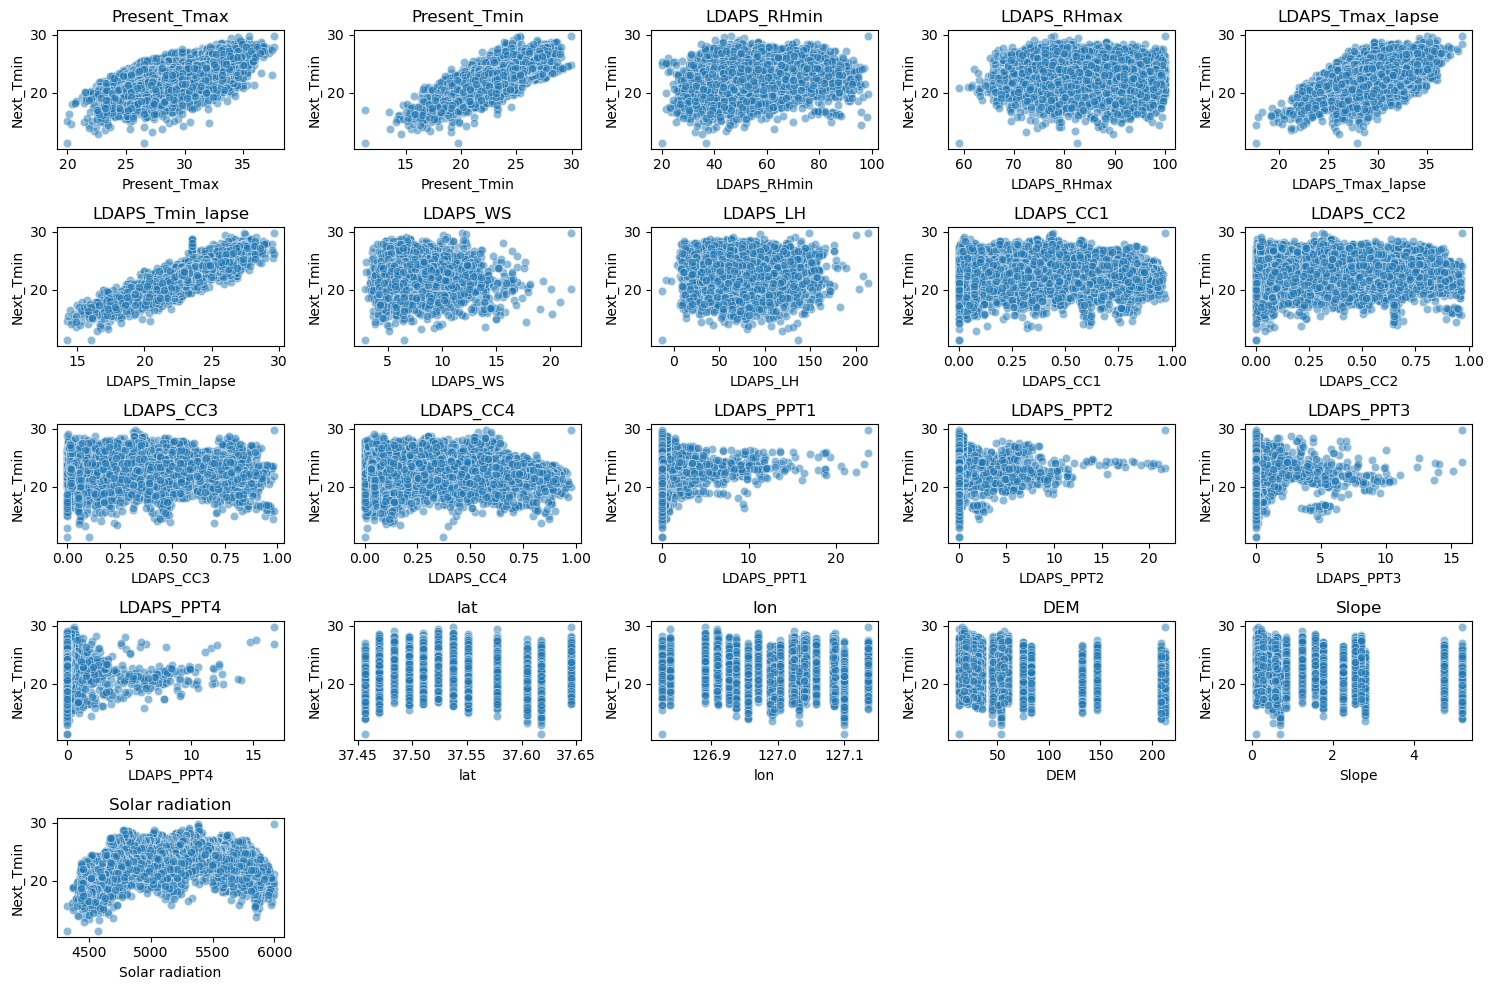

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.scatterplot(x=df[feature], y=df['Next_Tmin'], alpha=0.5)
    plt.title(feature)
plt.tight_layout()
plt.show()

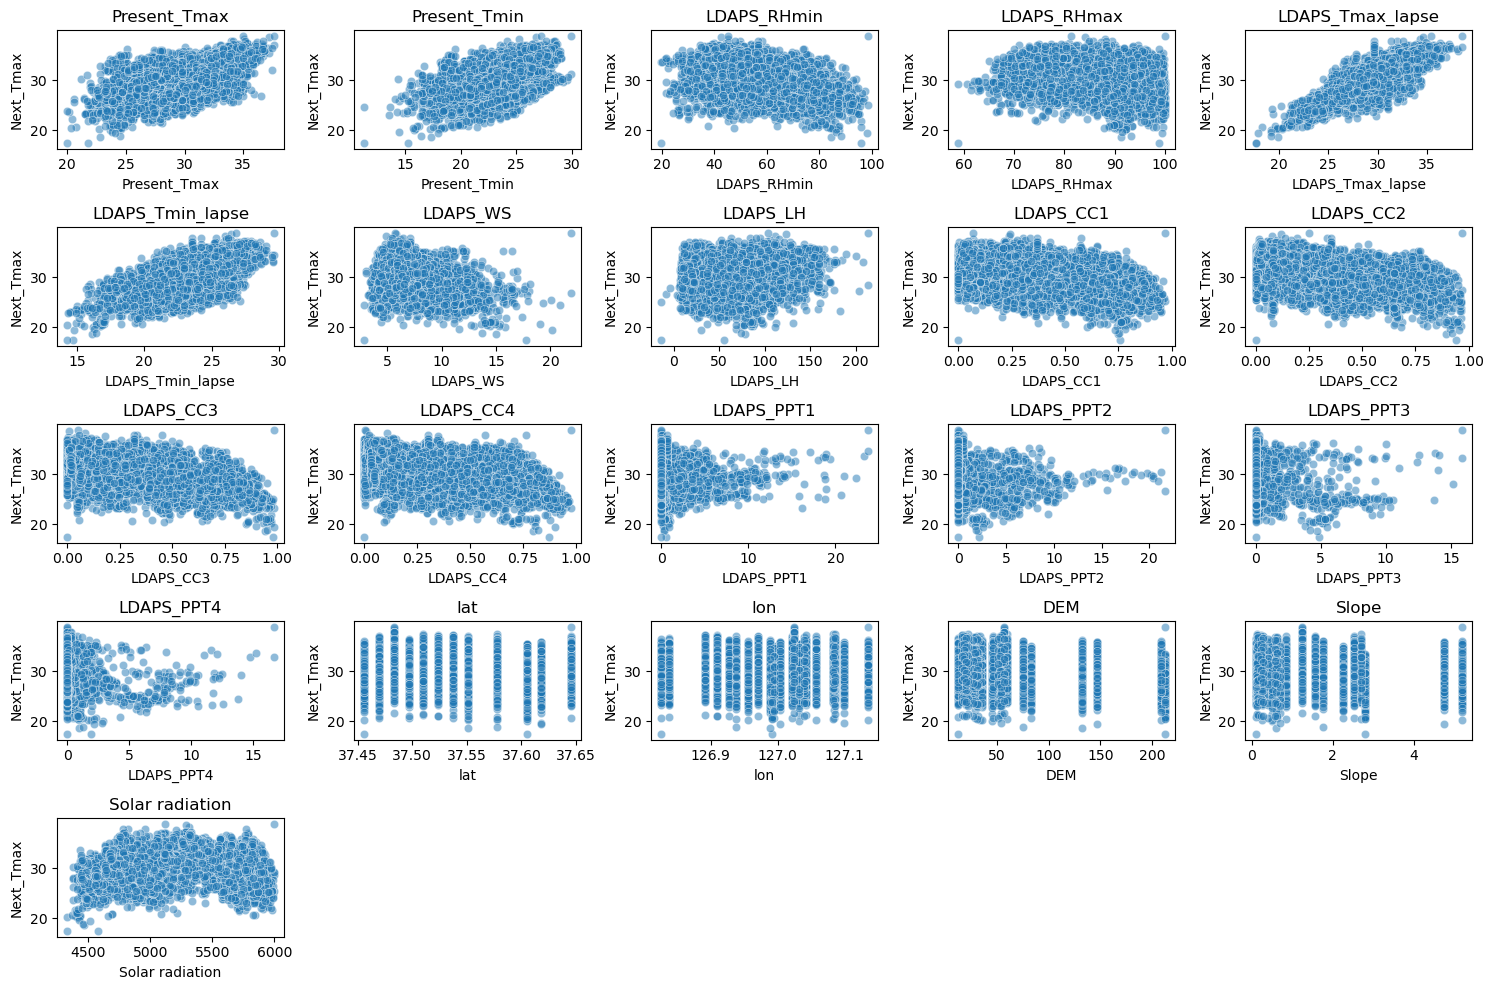

In [19]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.scatterplot(x=df[feature], y=df['Next_Tmax'], alpha=0.5)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [20]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [21]:
df.shape

(7725, 23)

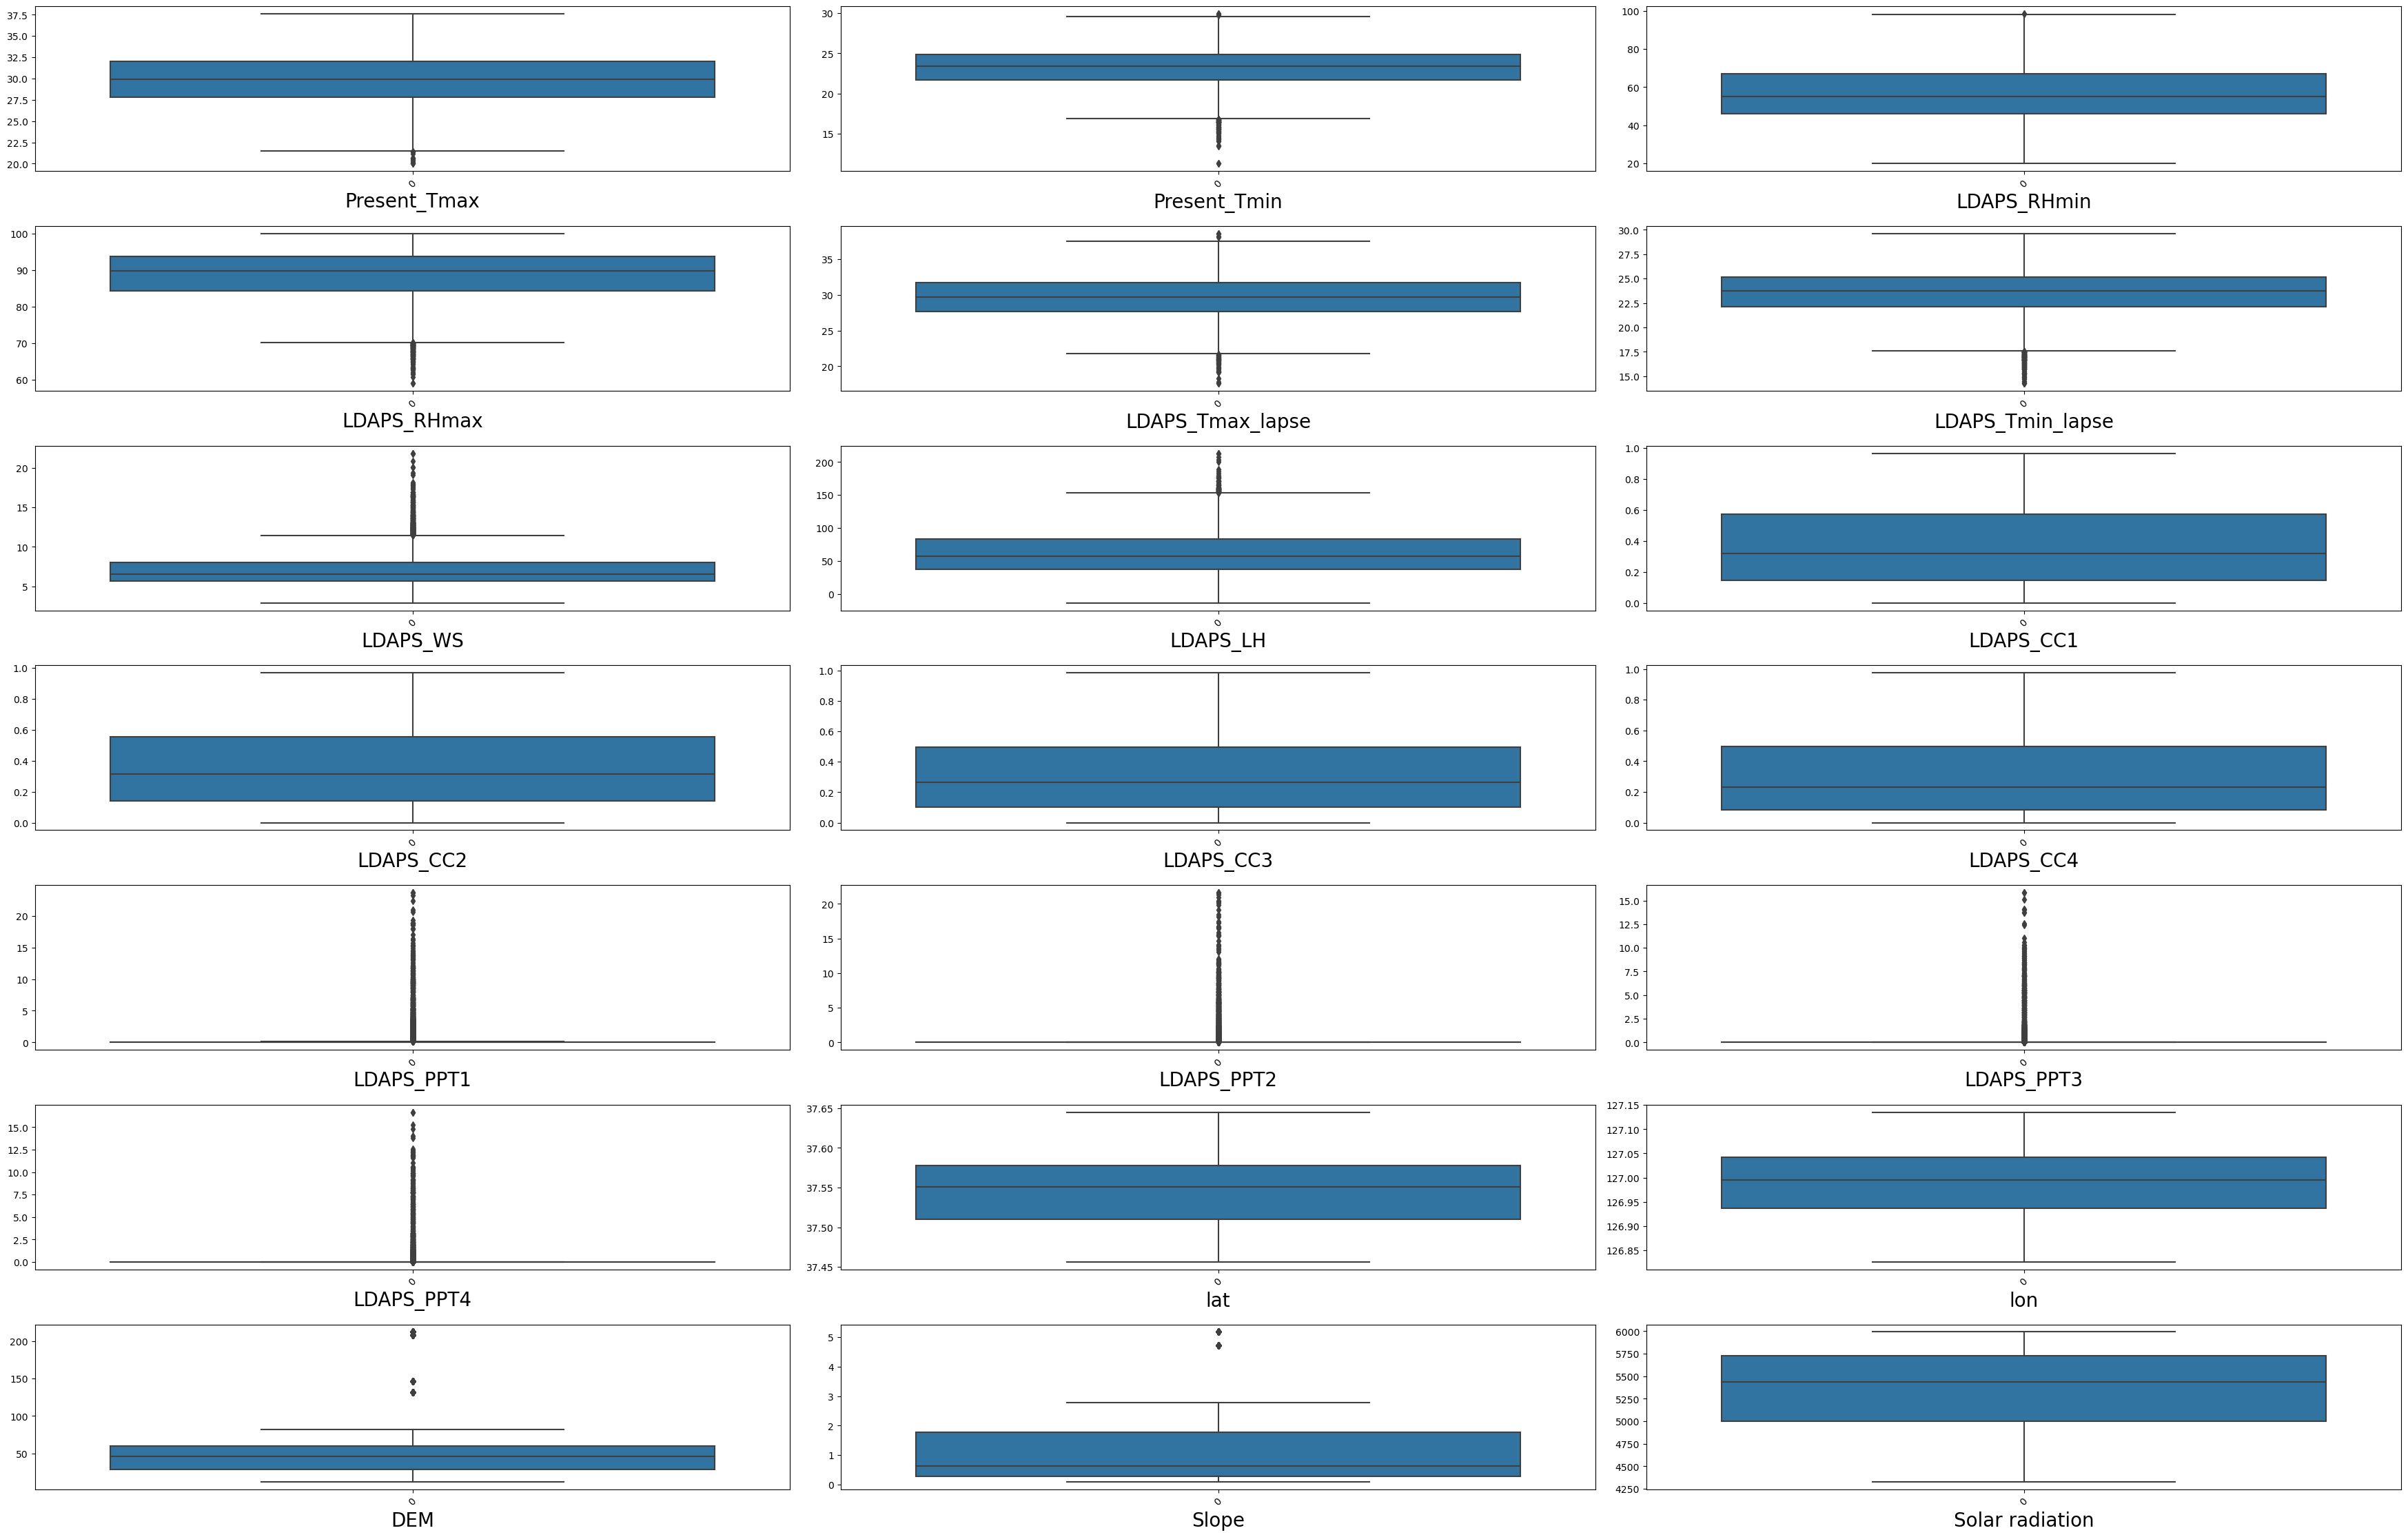

In [22]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(35, 25))
graph = 1

for column in features:
    if graph <= 30:
        plt.subplot(8, 3, graph)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20) 
        plt.xticks(rotation=45) 
    
    graph += 1

plt.tight_layout()
plt.show()

There are outliers present in many columns.we ll try to remove them using zscore or IQR method.

In [23]:
out_features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'
       ]]

# 1st quantile
Q1=out_features.quantile (0.25)

# 3rd quantile
Q3=out_features.quantile (0.75)

#IQR
IQR=Q3- Q1

df1=df[~((df< (Q1-1.5 *IQR)) | (df> (Q3 + 1.5* IQR))).any (axis=1)]

In [24]:
df1.shape

(3261, 23)

In [25]:
print("Data Loss Percentage After removing outliers with IQR method-", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with IQR method- 57.78640776699029


In [26]:
from scipy.stats import zscore
z = np.abs(zscore(out_features))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope
Date,,,,,,,,,,,,,
2013-06-30,0.361459,0.758555,0.383500,0.525958,0.216327,0.127942,0.208117,0.305593,0.276350,0.240477,0.224552,2.768510,1.113060
2013-06-30,0.719982,0.675408,0.312077,0.079955,0.224181,0.646891,0.313855,0.305593,0.276350,0.240477,0.224552,0.315940,0.543030
2013-06-30,0.618597,0.031333,0.613599,0.162014,0.451542,0.441367,1.248595,0.305593,0.276350,0.240477,0.224552,0.526799,0.723888
2013-06-30,0.753777,0.072906,1.132753,0.030141,0.079539,0.666157,0.097113,0.305593,0.276350,0.240477,0.224552,0.298388,0.930598
2013-06-30,0.551007,0.550689,0.249316,0.171318,0.010852,0.627038,1.355925,0.305593,0.276350,0.240477,0.224552,0.494934,0.549302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,2.186392,2.546195,1.326055,1.113261,2.029332,0.436443,0.285797,0.305593,0.276350,0.240477,0.224552,0.852951,0.804617
2017-08-30,2.186392,2.296757,1.545901,0.888809,2.047397,0.255063,0.453808,0.305593,0.276350,0.240477,0.224552,0.821512,0.755830
2017-08-30,2.220187,2.421476,1.553053,0.571859,2.137614,0.088652,1.590818,0.305593,0.276350,0.240477,0.224552,0.779383,0.720096


In [27]:
np.where(z>3)

(array([  25,   25,   26, ..., 7724, 7724, 7724], dtype=int64),
 array([ 5,  8,  8, ...,  8,  9, 10], dtype=int64))

In [28]:
# now removing the data above Zscore and creating new DF
df2 = df[(z<3).all(axis=1)]
df2.shape

(6882, 23)

In [29]:
print("Data Loss Percentage After removing outliers with ZSCORE method-", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage After removing outliers with ZSCORE method- 10.912621359223301


As we can see data loss is less while using zscore as compared to IQR method. so we will consider zscore method.

In [30]:
df=df2

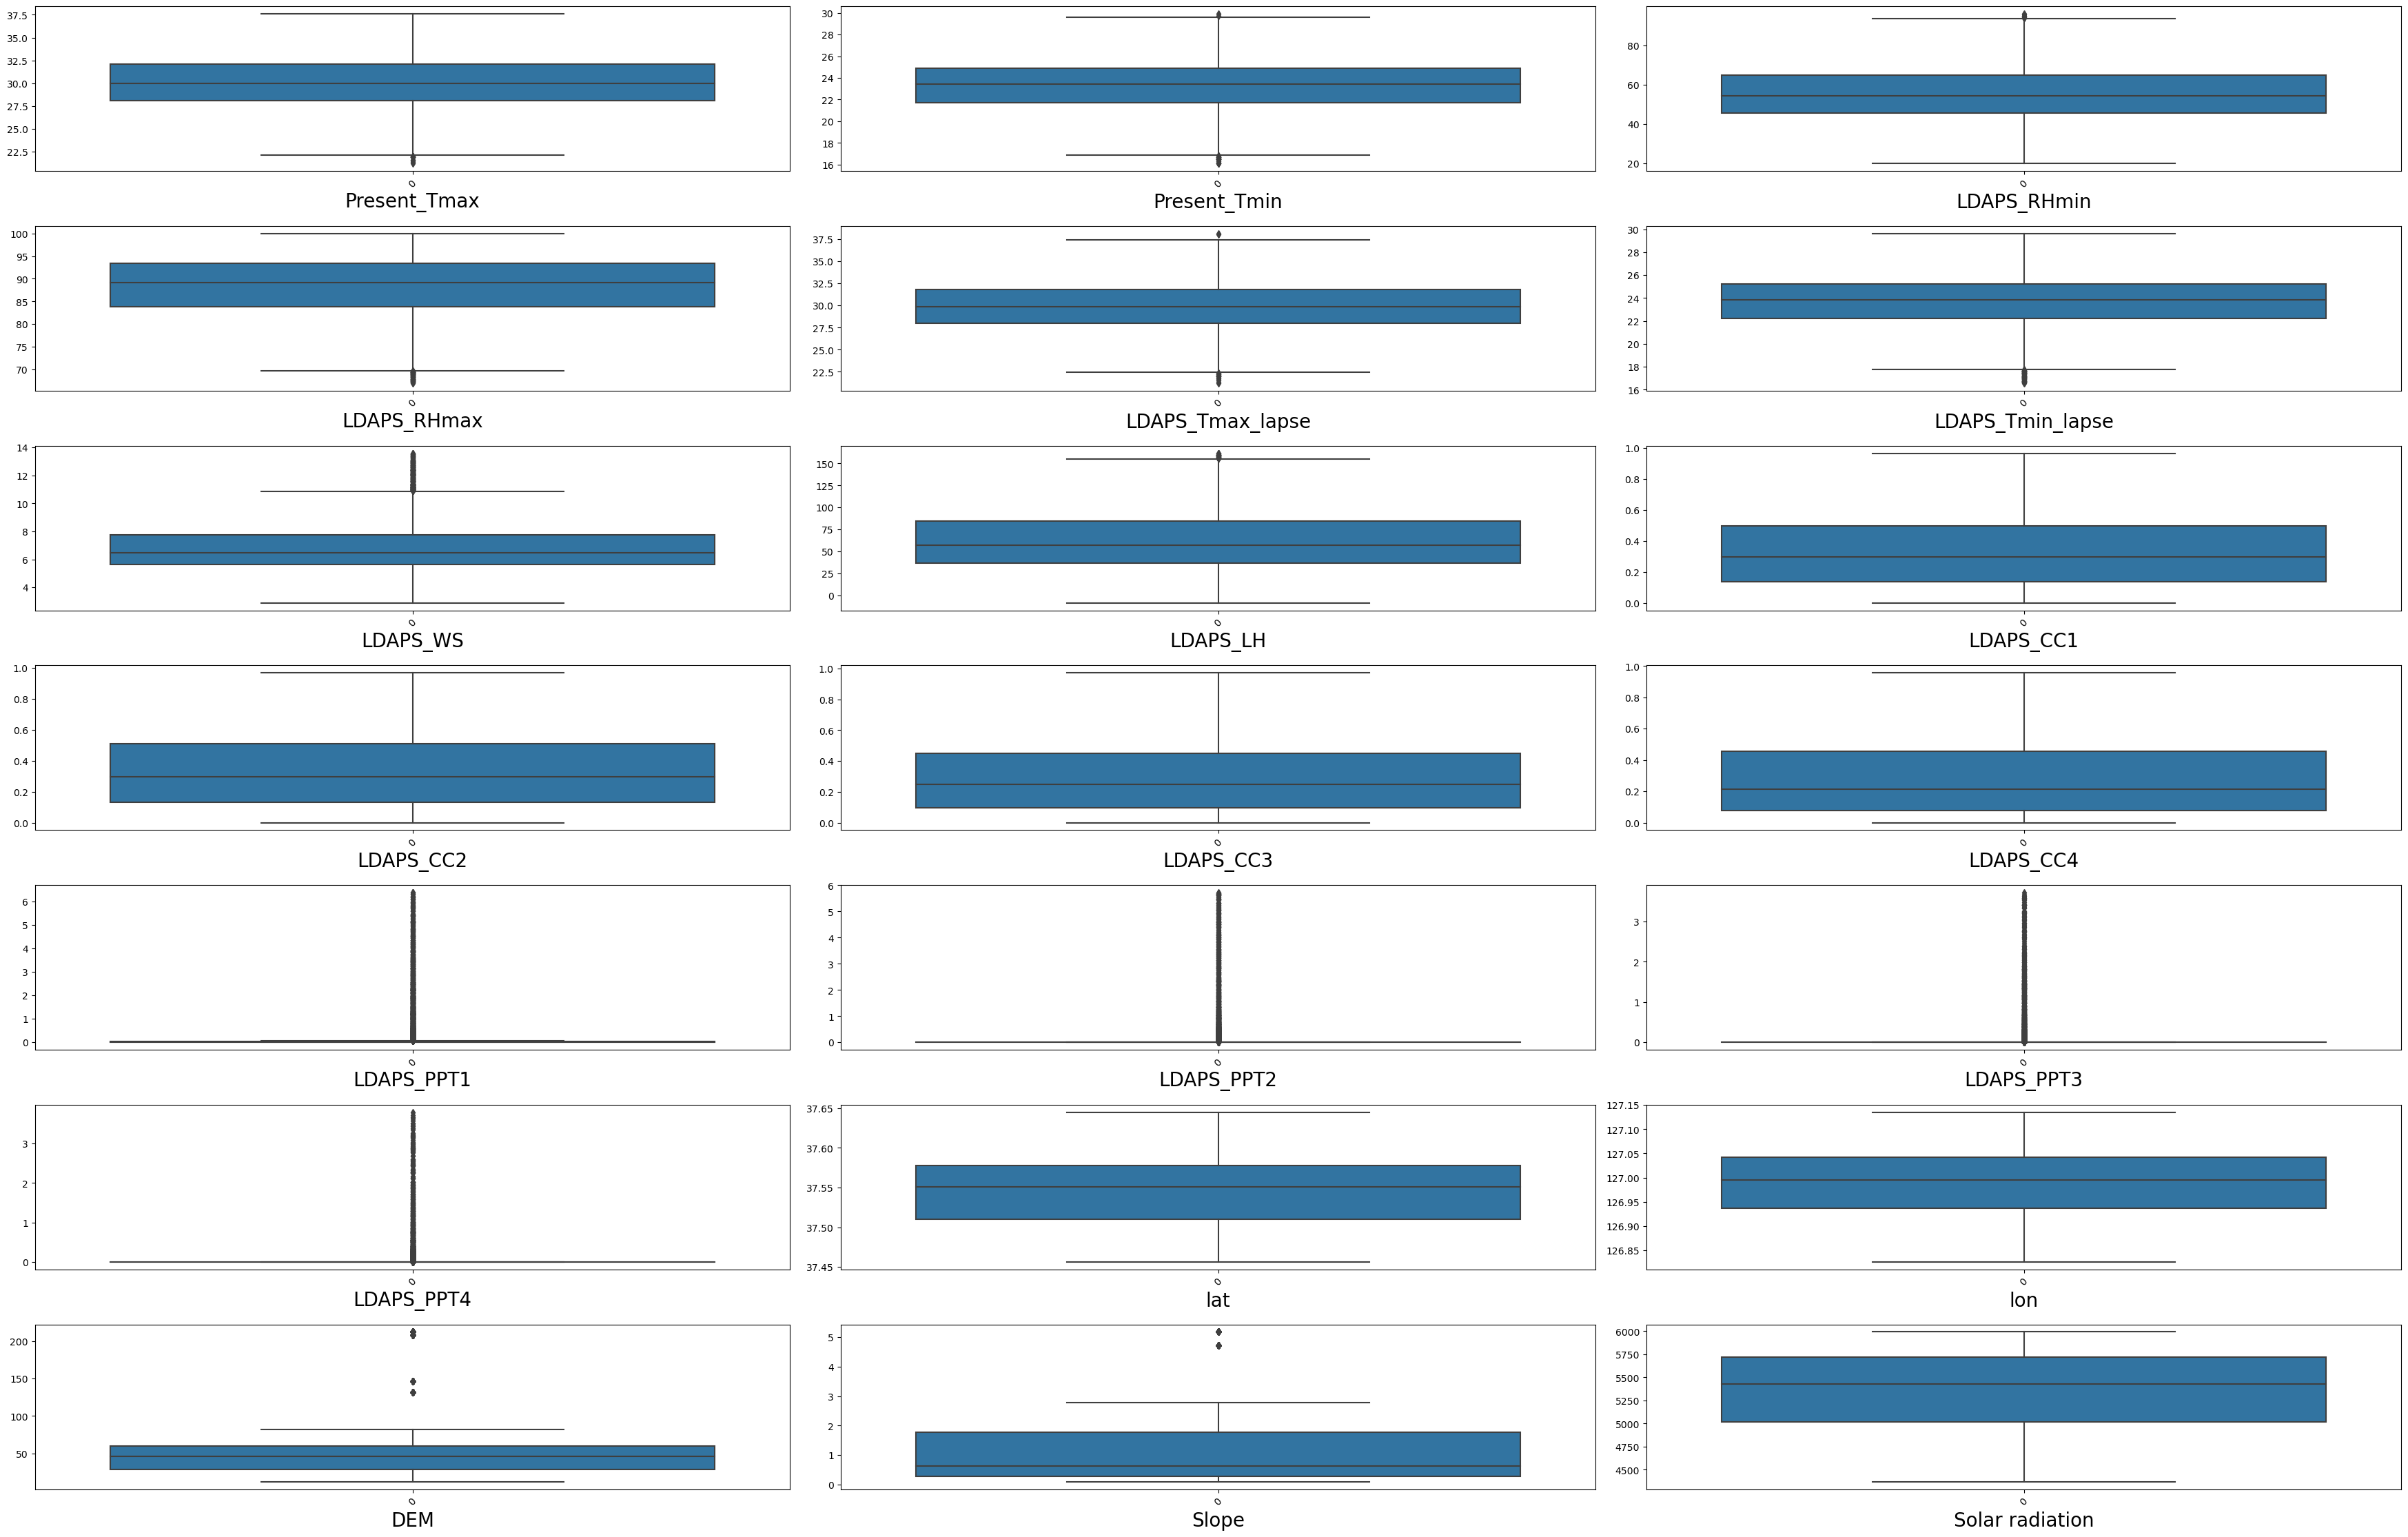

In [31]:
# again checking the outliers using boxplot
plt.figure(figsize=(35, 25))
graph = 1

for column in features:
    if graph <= 30:
        plt.subplot(8, 3, graph)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20) 
        plt.xticks(rotation=45) 
    
    graph += 1

plt.tight_layout()
plt.show()

Now we will check for skewness.

In [32]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.685320
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            1.087032
LDAPS_LH            0.564929
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3           0.703058
LDAPS_CC4           0.711145
LDAPS_PPT1          3.736638
LDAPS_PPT2          4.846766
LDAPS_PPT3          5.511364
LDAPS_PPT4          5.922343
lat                 0.105240
lon                -0.277425
DEM                 1.759064
Slope               1.589136
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [33]:
skewed_columns = ['LDAPS_RHmax','LDAPS_WS','LDAPS_CC3','LDAPS_CC4',  'LDAPS_LH','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'
]

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [34]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.807233
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.615558
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          1.859390
LDAPS_PPT2          2.248512
LDAPS_PPT3          2.397718
LDAPS_PPT4          2.711122
lat                 0.105240
lon                -0.277425
DEM                 0.932772
Slope               0.619573
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [35]:
skewed_columns = ['LDAPS_RHmax','LDAPS_WS','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'
]

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [36]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.838490
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.497094
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          1.181350
LDAPS_PPT2          1.413810
LDAPS_PPT3          1.509780
LDAPS_PPT4          1.842869
lat                 0.105240
lon                -0.277425
DEM                 0.678983
Slope               0.346955
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [37]:
skewed_columns = ['LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [38]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.773430
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.497094
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          1.561823
LDAPS_PPT2          1.854190
LDAPS_PPT3          1.917870
LDAPS_PPT4          2.240566
lat                 0.105240
lon                -0.277425
DEM                 1.171621
Slope               0.346955
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [39]:
skewed_columns = ['LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM']

for column in skewed_columns:
    df[column] = np.log1p(df[column])

In [40]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.831278
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.497094
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          1.299178
LDAPS_PPT2          1.544458
LDAPS_PPT3          1.635947
LDAPS_PPT4          1.965307
lat                 0.105240
lon                -0.277425
DEM                 0.741137
Slope               0.346955
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [41]:
skewed_columns = ['LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM']

for column in skewed_columns:
    df[column] = df[column] ** 2

In [42]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.804962
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.497094
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          1.539083
LDAPS_PPT2          1.827515
LDAPS_PPT3          1.905937
LDAPS_PPT4          2.228582
lat                 0.105240
lon                -0.277425
DEM                 0.948030
Slope               0.346955
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

In [43]:
from scipy.stats import yeojohnson

# Applying Yeo-Johnson transformation
skewed_columns = ['LDAPS_RHmax','LDAPS_PPT1','LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM']

for column in skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)


In [44]:
df.skew()

Present_Tmax       -0.275854
Present_Tmin       -0.231426
LDAPS_RHmin         0.309910
LDAPS_RHmax        -0.095465
LDAPS_Tmax_lapse   -0.105904
LDAPS_Tmin_lapse   -0.394507
LDAPS_WS            0.497094
LDAPS_LH           -0.280012
LDAPS_CC1           0.595631
LDAPS_CC2           0.503904
LDAPS_CC3          -0.562557
LDAPS_CC4          -0.428195
LDAPS_PPT1          0.782410
LDAPS_PPT2          0.959096
LDAPS_PPT3          0.000000
LDAPS_PPT4          0.000000
lat                 0.105240
lon                -0.277425
DEM                 0.063273
Slope               0.346955
Solar radiation    -0.506458
Next_Tmax          -0.268924
Next_Tmin          -0.294059
dtype: float64

We have removed skewness from almost each column except LDAPS_PPT1 and after applying many transformations it still exits so we will move ahead with it as it is.

In [45]:
cor = df.corr()
cor

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.614446,-0.149129,-0.314181,0.535477,0.611406,-0.089058,0.111403,-0.284195,-0.152253,...,-0.084240,-0.042462,-0.024890,-0.050754,0.010601,-0.132563,-0.094218,-0.061687,0.587468,0.616239
Present_Tmin,0.614446,1.000000,0.153195,-0.049981,0.435965,0.755142,0.027123,-0.011424,0.092595,0.120841,...,0.138373,0.049248,-0.040032,-0.071879,-0.044604,-0.239590,-0.160884,0.015239,0.449139,0.786661
LDAPS_RHmin,-0.149129,0.153195,1.000000,0.567062,-0.552750,0.134440,0.207527,0.008094,0.576137,0.714826,...,0.514901,0.446569,0.262350,0.088940,-0.095132,0.058360,0.084588,0.251548,-0.425685,0.139956
LDAPS_RHmax,-0.314181,-0.049981,0.567062,1.000000,-0.401778,-0.155898,0.088074,0.288541,0.428225,0.375060,...,0.399455,0.253332,0.097329,0.230652,0.012131,0.174079,0.210541,0.167199,-0.320725,-0.103033
LDAPS_Tmax_lapse,0.535477,0.435965,-0.552750,-0.401778,1.000000,0.620793,-0.195142,-0.008470,-0.414982,-0.491187,...,-0.351720,-0.327226,-0.230979,-0.038758,0.103694,-0.114326,-0.110409,0.015078,0.807311,0.547563
LDAPS_Tmin_lapse,0.611406,0.755142,0.134440,-0.155898,0.620793,1.000000,-0.033179,-0.145800,0.040881,0.105535,...,0.045759,-0.020520,-0.091175,-0.090394,-0.029161,-0.172920,-0.160889,0.111431,0.540855,0.870015
LDAPS_WS,-0.089058,0.027123,0.207527,0.088074,-0.195142,-0.033179,1.000000,-0.047850,0.234443,0.190693,...,0.195974,0.124361,0.152487,-0.019714,-0.077252,0.115086,0.104913,0.140738,-0.240644,0.004667
LDAPS_LH,0.111403,-0.011424,0.008094,0.288541,-0.008470,-0.145800,-0.047850,1.000000,-0.099313,-0.209161,...,-0.048211,-0.010068,0.004672,0.089481,0.006177,0.067795,0.071470,-0.035890,0.138008,-0.057519
LDAPS_CC1,-0.284195,0.092595,0.576137,0.428225,-0.414982,0.040881,0.234443,-0.099313,1.000000,0.759614,...,0.621302,0.318909,0.210295,-0.005760,-0.015181,-0.027633,-0.031038,0.242555,-0.447036,0.013575
LDAPS_CC2,-0.152253,0.120841,0.714826,0.375060,-0.491187,0.105535,0.190693,-0.209161,0.759614,1.000000,...,0.679743,0.431011,0.256020,-0.001858,-0.015020,-0.025975,-0.029251,0.186765,-0.476339,0.084050


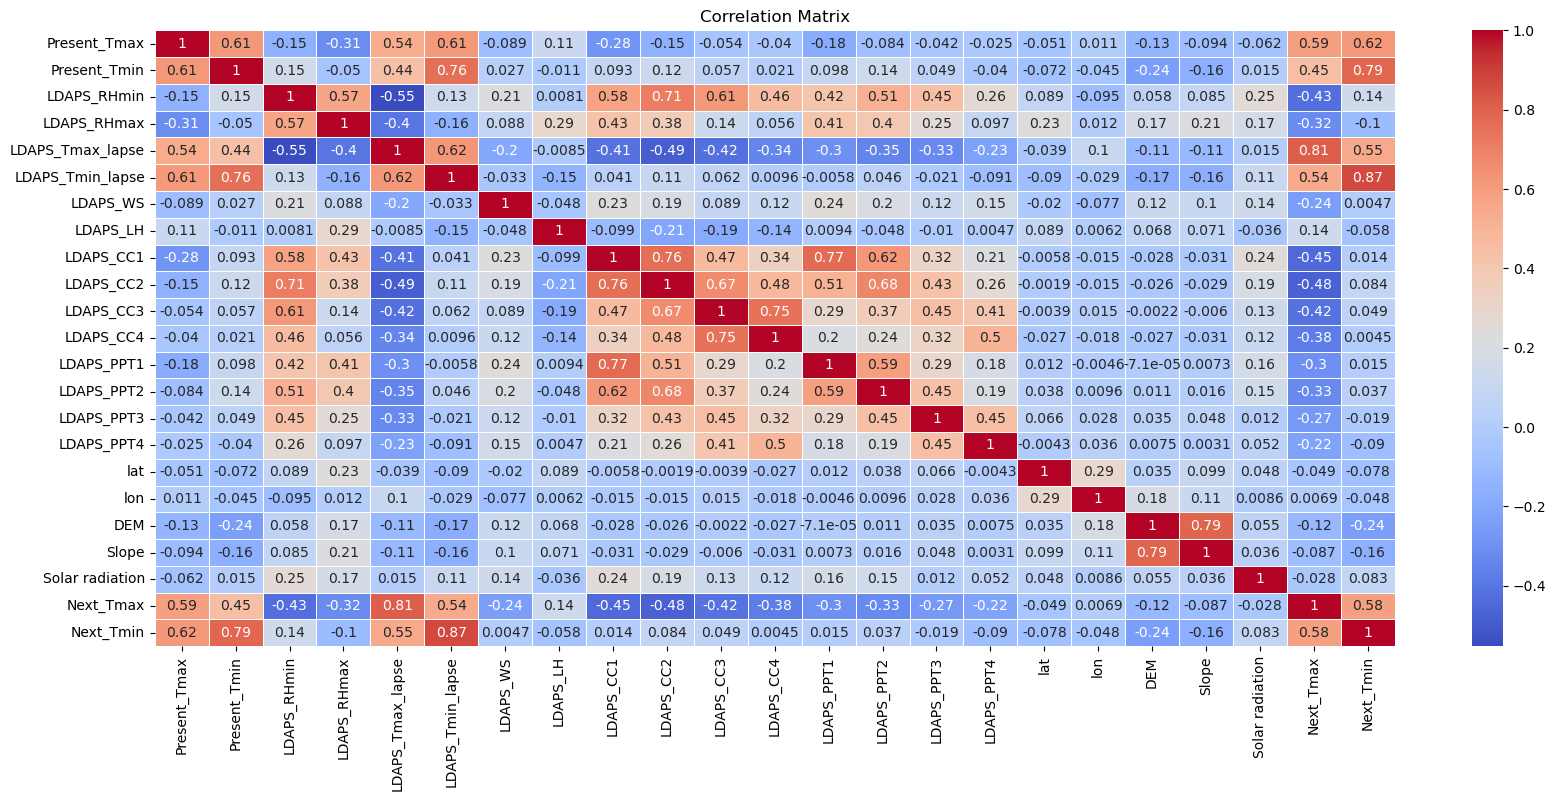

In [46]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

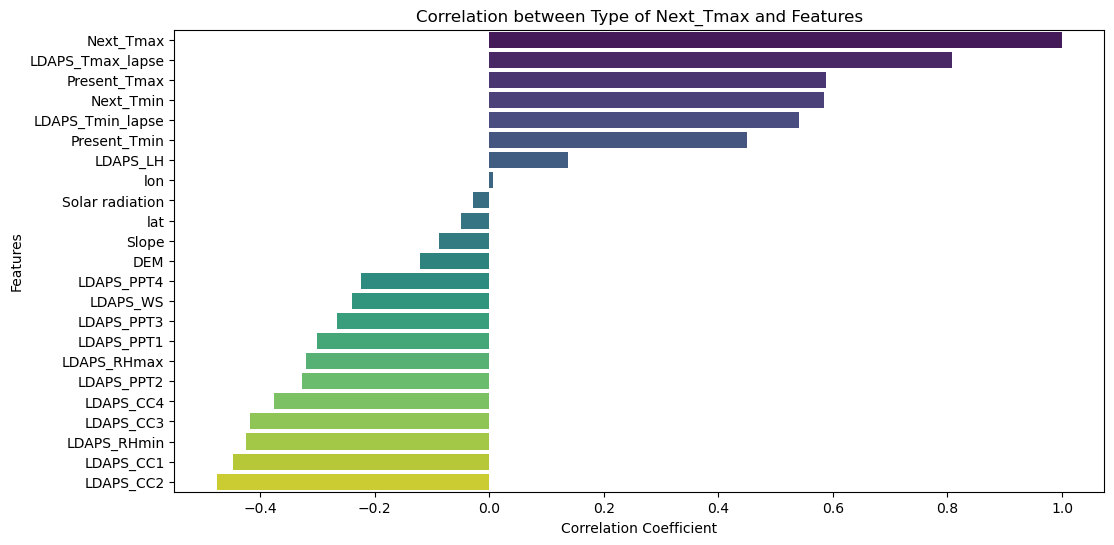

In [47]:
correlation_with_target = df.corr()['Next_Tmax'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between Type of Next_Tmax and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

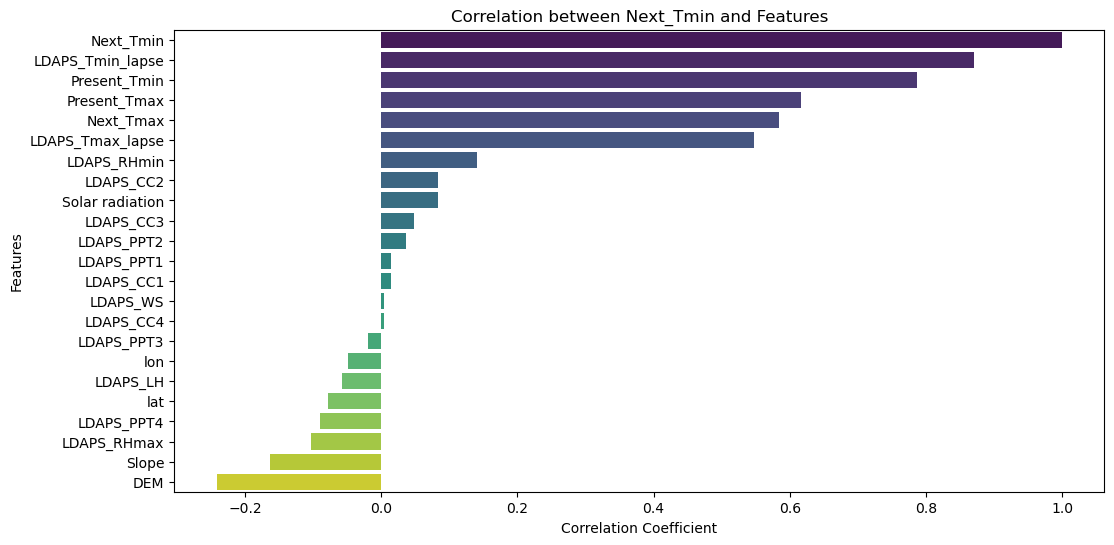

In [48]:
correlation_with_target = df.corr()['Next_Tmin'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title(f'Correlation between Next_Tmin and Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [49]:
# Defining features and target variables
x1 = df.drop(['Next_Tmin'], axis=1)
y1 = df['Next_Tmin']


In [50]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-0.430853,-0.820847,0.194923,0.348815,-0.660831,-0.284213,0.081525,0.389903,-0.443046,-0.530482,...,-0.709399,-0.644246,-0.614672,-0.531071,1.210581,0.001812,1.855709,1.278576,1.549457,-0.496476
1,0.687556,-0.734523,-0.238852,0.261204,-0.011231,0.177469,-0.621510,-0.114425,-0.476746,-0.330567,...,-0.709399,-0.644246,-0.614672,-0.531071,1.210581,0.517211,0.060328,-0.350823,1.255859,-0.020113
2,0.582705,-0.000761,-0.497490,-0.722080,0.076744,0.415759,-0.330293,-1.431333,-0.541294,-0.306773,...,-0.709399,-0.644246,-0.614672,-0.531071,0.671135,0.844050,-0.366008,-0.871581,1.242182,0.184043
3,0.722506,0.042402,0.193772,1.383363,-0.064637,-0.140850,-0.649774,0.290448,-0.513228,-0.438170,...,-0.709399,-0.644246,-0.614672,-0.531071,2.017752,0.391504,0.089749,1.175228,1.226524,0.388199
4,0.512805,-0.605035,0.044239,0.185698,-0.280622,-0.068862,-0.592565,1.255333,-0.772650,-0.337983,...,-0.709399,-0.644246,-0.614672,-0.531071,0.133686,1.811994,-0.291138,-0.364889,1.232671,0.218069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,-2.388070,-2.374696,-2.234927,-1.371633,-0.756413,-2.396629,-0.045080,-2.246986,-1.166002,-1.255913,...,-0.709399,-0.644246,-0.614672,-0.531071,0.133686,0.617777,-0.724472,-0.260770,-2.101701,-1.006866
6878,-2.597772,-2.547346,-1.843604,-0.758309,-1.161471,-2.616216,-0.570480,0.704303,-1.111858,-1.279508,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.675483,1.196030,-1.007401,-1.360585,-2.135486,-0.870762
6879,-2.318169,-2.676833,-2.086363,-1.310050,-1.290479,-2.184367,-0.323535,0.457404,-1.257320,-1.043512,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.136037,-1.255259,-1.568484,-1.256486,-2.131898,-0.768684
6880,-2.318169,-2.417858,-2.281861,-1.465991,-1.049844,-2.203299,-0.081181,-0.268611,-1.234001,-1.068869,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.405760,-1.028986,-1.395575,-1.004138,-2.143635,-0.666606


In [51]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

print(vif_data)

            Variable       VIF
0       Present_Tmax  2.745662
1       Present_Tmin  3.022401
2        LDAPS_RHmin  5.972260
3        LDAPS_RHmax  2.461799
4   LDAPS_Tmax_lapse  7.864910
5   LDAPS_Tmin_lapse  6.640203
6           LDAPS_WS  1.206912
7           LDAPS_LH  1.485419
8          LDAPS_CC1  5.270097
9          LDAPS_CC2  5.317839
10         LDAPS_CC3  3.718077
11         LDAPS_CC4  2.696589
12        LDAPS_PPT1  3.031131
13        LDAPS_PPT2  2.458565
14        LDAPS_PPT3  1.690090
15        LDAPS_PPT4  1.601295
16               lat  1.220134
17               lon  1.225317
18               DEM  2.937700
19             Slope  2.820888
20   Solar radiation  1.237573
21         Next_Tmax  3.858094


Clearly there is no multicollinearity exists.

In [52]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [53]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')

Best Random State: 38


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x1, y1, test_size = 0.30, random_state =best_RS)

In [55]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

Results for LinearRegression:
R2_score:  0.8410810718916181
R2_score on training Data: 83.48825749910273
Mean Absolute Error:- 0.7548798244092348
Mean Squared Error:- 0.9273725182633271
Root Mean Squared Error:- 0.9630018267185827
Cross-validation scores: [0.76120098 0.683678   0.80301318 0.84395798 0.86286077]
Mean Cross-validation score: 0.7909421833391616
Difference between R2 score and cross-validation score is 5.013888855245652


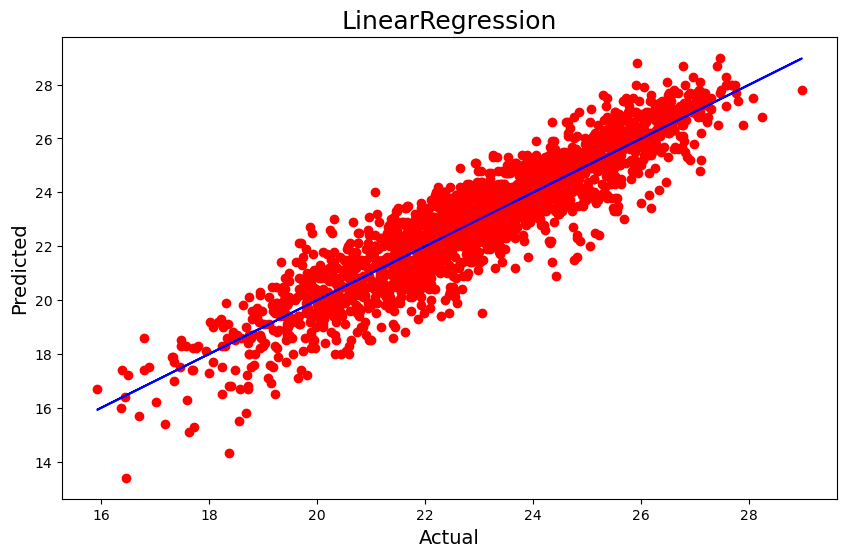



Results for RandomForestRegressor:
R2_score:  0.9002352517732011
R2_score on training Data: 98.57547311101665
Mean Absolute Error:- 0.5824043583535112
Mean Squared Error:- 0.5821778871670704
Root Mean Squared Error:- 0.7630058238094061
Cross-validation scores: [0.73553543 0.69554929 0.81569637 0.84736132 0.84714862]
Mean Cross-validation score: 0.788258204409053
Difference between R2 score and cross-validation score is 11.197704736414805


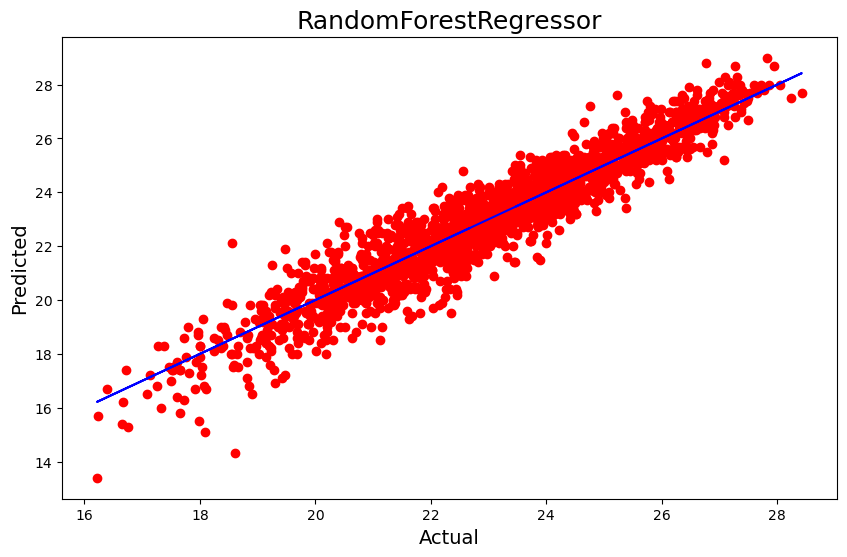



Results for DecisionTreeRegressor:
R2_score:  0.7798042236992286
R2_score on training Data: 100.0
Mean Absolute Error:- 0.8445036319612591
Mean Squared Error:- 1.284953995157385
Root Mean Squared Error:- 1.1335581128276508
Cross-validation scores: [0.45687922 0.46636114 0.62254717 0.72391066 0.63811687]
Mean Cross-validation score: 0.5815630093425975
Difference between R2 score and cross-validation score is 19.824121435663113


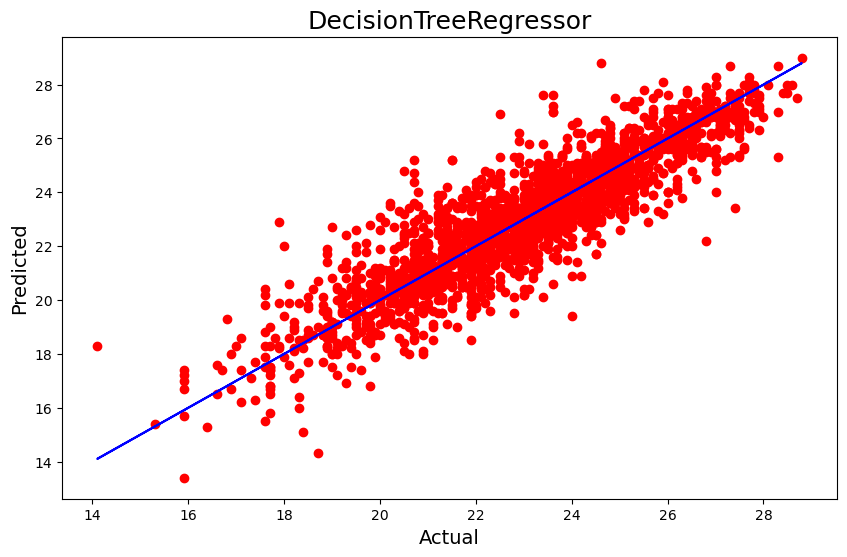



Results for KNeighborsRegressor:
R2_score:  0.8608445811890227
R2_score on training Data: 91.41747299103919
Mean Absolute Error:- 0.6906634382566587
Mean Squared Error:- 0.812042421307506
Root Mean Squared Error:- 0.9011339641293663
Cross-validation scores: [0.49509894 0.49100995 0.64762337 0.71357761 0.78041836]
Mean Cross-validation score: 0.6255456453188202
Difference between R2 score and cross-validation score is 23.529893587020258


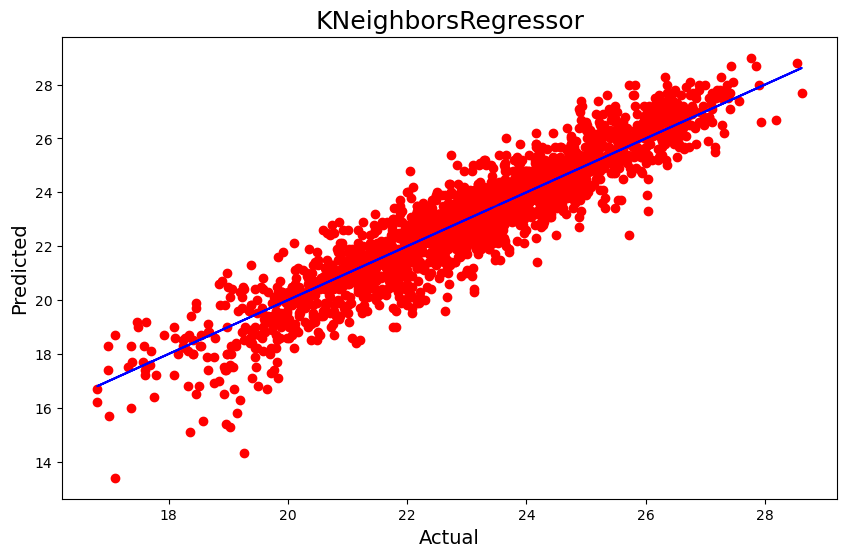



Results for Lasso:
R2_score:  0.5879283940053202
R2_score on training Data: 58.63919786805953
Mean Absolute Error:- 1.2312358871212465
Mean Squared Error:- 2.4046467434985432
Root Mean Squared Error:- 1.550692343277203
Cross-validation scores: [0.55122948 0.40984493 0.57252444 0.46674271 0.63338723]
Mean Cross-validation score: 0.5267457596916912
Difference between R2 score and cross-validation score is 6.118263431362891


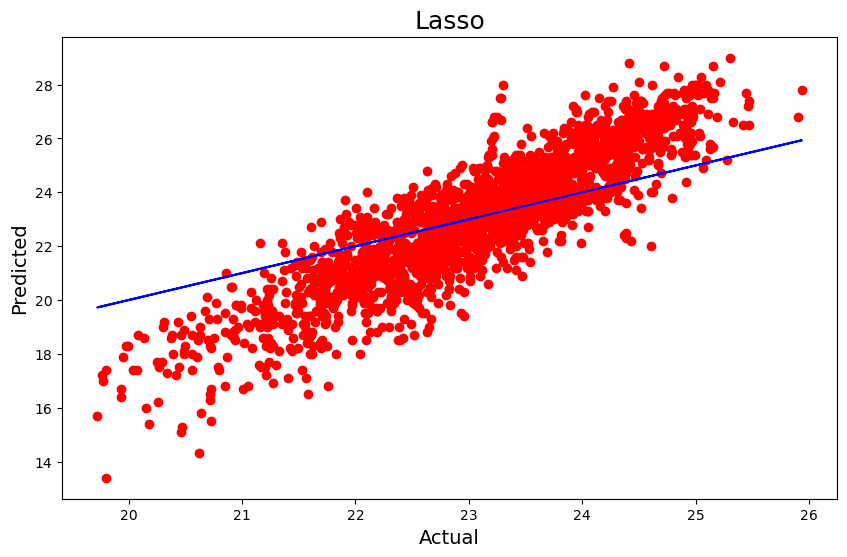



Results for Ridge:
R2_score:  0.8410763965995252
R2_score on training Data: 83.48824750513846
Mean Absolute Error:- 0.754906845197735
Mean Squared Error:- 0.9273998009630874
Root Mean Squared Error:- 0.9630159920598865
Cross-validation scores: [0.76123197 0.68372489 0.80298687 0.84397895 0.86287644]
Mean Cross-validation score: 0.7909598199858678
Difference between R2 score and cross-validation score is 5.0116576613657315


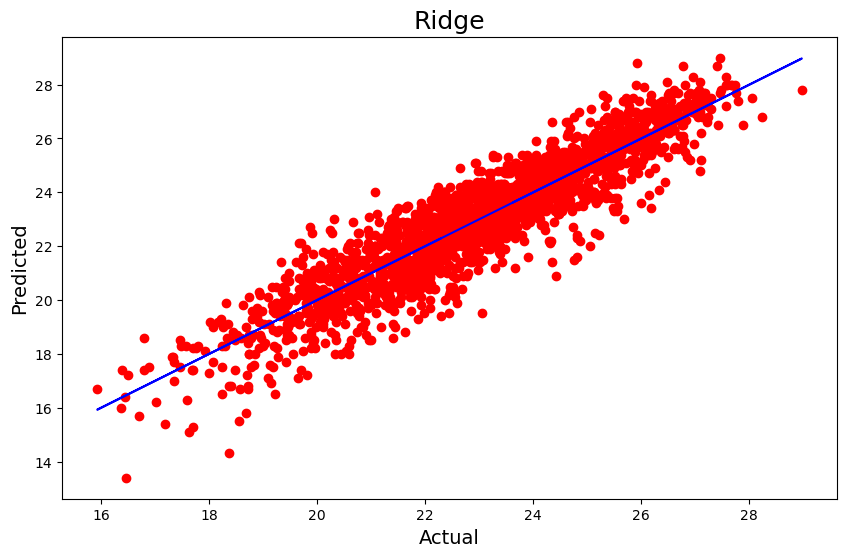

In [56]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x1, y1, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

Random ForestRegressor is the best model as it has maximum R2_score and the difference between R2 score and cross-validation score is also less.

In [57]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 150, 200],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [1, 2, 6]
}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')


In [58]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 7, 10],
                         'n_estimators': [50, 150, 200]},
             scoring='accuracy')

In [59]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [60]:
best_model1 = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred1 = best_model1.predict(x_test)

print("R2_score: ",r2_score (y_test, pred1))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred1)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred1))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred1)))



R2_score:  0.9007239906647069
Mean Absolute Error:- 0.5805549636803874
Mean Squared Error:- 0.5793258479418885
Root Mean Squared Error:- 0.7611345793891435


In [61]:
import joblib
joblib.dump(best_model1, "Next_Tmin.pkl")

['Next_Tmin.pkl']

In [62]:
# loading the saved model and getting the predictions
model1=joblib.load("Next_Tmin.pkl")

# Prediction
prediction1 = best_model1.predict(x_test)
prediction1

array([22.56 , 22.194, 22.076, ..., 20.972, 20.018, 23.592])

In [63]:
# Defining features and target variables
x2 = df.drop(['Next_Tmax'], axis=1)
y2 = df['Next_Tmax']


In [64]:
# standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2= pd.DataFrame(scaler.fit_transform(x2), columns = x2.columns)
x2

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-0.430853,-0.820847,0.194923,0.348815,-0.660831,-0.284213,0.081525,0.389903,-0.443046,-0.530482,...,-0.709399,-0.644246,-0.614672,-0.531071,1.210581,0.001812,1.855709,1.278576,1.549457,-0.784509
1,0.687556,-0.734523,-0.238852,0.261204,-0.011231,0.177469,-0.621510,-0.114425,-0.476746,-0.330567,...,-0.709399,-0.644246,-0.614672,-0.531071,1.210581,0.517211,0.060328,-0.350823,1.255859,-0.238987
2,0.582705,-0.000761,-0.497490,-0.722080,0.076744,0.415759,-0.330293,-1.431333,-0.541294,-0.306773,...,-0.709399,-0.644246,-0.614672,-0.531071,0.671135,0.844050,-0.366008,-0.871581,1.242182,0.348499
3,0.722506,0.042402,0.193772,1.383363,-0.064637,-0.140850,-0.649774,0.290448,-0.513228,-0.438170,...,-0.709399,-0.644246,-0.614672,-0.531071,2.017752,0.391504,0.089749,1.175228,1.226524,0.516352
4,0.512805,-0.605035,0.044239,0.185698,-0.280622,-0.068862,-0.592565,1.255333,-0.772650,-0.337983,...,-0.709399,-0.644246,-0.614672,-0.531071,0.133686,1.811994,-0.291138,-0.364889,1.232671,-0.238987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6877,-2.388070,-2.374696,-2.234927,-1.371633,-0.756413,-2.396629,-0.045080,-2.246986,-1.166002,-1.255913,...,-0.709399,-0.644246,-0.614672,-0.531071,0.133686,0.617777,-0.724472,-0.260770,-2.101701,-2.253223
6878,-2.597772,-2.547346,-1.843604,-0.758309,-1.161471,-2.616216,-0.570480,0.704303,-1.111858,-1.279508,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.675483,1.196030,-1.007401,-1.360585,-2.135486,-2.505003
6879,-2.318169,-2.676833,-2.086363,-1.310050,-1.290479,-2.184367,-0.323535,0.457404,-1.257320,-1.043512,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.136037,-1.255259,-1.568484,-1.256486,-2.131898,-2.085370
6880,-2.318169,-2.417858,-2.281861,-1.465991,-1.049844,-2.203299,-0.081181,-0.268611,-1.234001,-1.068869,...,-0.709399,-0.644246,-0.614672,-0.531071,-0.405760,-1.028986,-1.395575,-1.004138,-2.143635,-1.791627


In [65]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x2.columns
vif_data["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]

print(vif_data)

            Variable       VIF
0       Present_Tmax  2.683102
1       Present_Tmin  3.309153
2        LDAPS_RHmin  5.984923
3        LDAPS_RHmax  2.460686
4   LDAPS_Tmax_lapse  6.601891
5   LDAPS_Tmin_lapse  8.344784
6           LDAPS_WS  1.185584
7           LDAPS_LH  1.454628
8          LDAPS_CC1  5.269980
9          LDAPS_CC2  5.329356
10         LDAPS_CC3  3.711000
11         LDAPS_CC4  2.644822
12        LDAPS_PPT1  3.042588
13        LDAPS_PPT2  2.472483
14        LDAPS_PPT3  1.690896
15        LDAPS_PPT4  1.605037
16               lat  1.222039
17               lon  1.216817
18               DEM  3.054210
19             Slope  2.853225
20   Solar radiation  1.236147
21         Next_Tmin  5.425916


In [66]:
best_RS = None
max_acc = 0
for random_state in range(1, 101): 
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=random_state)

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    accuracy = r2_score(y_test, predictions)

    if accuracy > max_acc:
        max_acc = accuracy
        best_RS = random_state

print(f'Best Random State: {best_RS}')
print(f'Maximum Accuracy: {max_acc}')

Best Random State: 61
Maximum Accuracy: 0.7929800439327708


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x2, y2, test_size = 0.30, random_state =best_RS)

In [68]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fitting the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x2, y2, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")

Results for LinearRegression:
R2_score:  0.7826425457589791
R2_score on training Data: 76.54082325288296
Mean Absolute Error:- 1.0627680931822903
Mean Squared Error:- 1.8981952693986066
Root Mean Squared Error:- 1.3777500750856835
Cross-validation scores: [0.71324387 0.66506829 0.68294919 0.76233397 0.67321888]
Mean Cross-validation score: 0.6993628415025327
Difference between R2 score and cross-validation score is 8.327970425644637


Results for RandomForestRegressor:
R2_score:  0.8869860433401047
R2_score on training Data: 98.43440636462797
Mean Absolute Error:- 0.739204842615012
Mean Squared Error:- 0.9869574460048426
Root Mean Squared Error:- 0.9934573196694675
Cross-validation scores: [0.72115329 0.66229941 0.67866629 0.71626421 0.64995076]
Mean Cross-validation score: 0.6856667920654094
Difference between R2 score and cross-validation score is 20.13192512746953


Results for DecisionTreeRegressor:
R2_score:  0.7430636351855249
R2_score on training Data: 100.0
Mean Absolute Error:

Random ForestRegressor is the best model as it has maximum R2_score and the difference between R2 score and cross-validation score is also less.

In [69]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 150, 200],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 7, 10],
    'min_samples_leaf': [1, 2, 6]
}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='accuracy')

In [70]:
# Fittng the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 6],
                         'min_samples_split': [2, 7, 10],
                         'n_estimators': [50, 150, 200]},
             scoring='accuracy')

In [71]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [72]:
best_model2 = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred2 = best_model2.predict(x_test)

print("R2_score: ",r2_score (y_test, pred2))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred2)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred2))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred2)))



R2_score:  0.8849767844759682
Mean Absolute Error:- 0.7465423728813559
Mean Squared Error:- 1.0045044203389828
Root Mean Squared Error:- 1.0022496796402496


In [73]:
import joblib
joblib.dump(best_model1, "Next_Tmax.pkl")

['Next_Tmax.pkl']

In [74]:
# loading the saved model and getting the predictions
model2=joblib.load("Next_Tmax.pkl")

# Prediction
prediction2 = best_model2.predict(x_test)
prediction2

array([24.384, 36.432, 29.572, ..., 31.64 , 31.248, 32.498])